## **네이버API를 이용한 크롤링**

### **크롤링이란**

빅데이터 분석에 필요한 데이터는 내부보다 외부에서 수집하는 경우가 더 많다.
빅데이터가 가장 많이 존재하는 곳이 SNS를 포함한 인터넷이므로 데이터 수집 장소는 대부분 인터넷이다.
인터넷을 통하면 다양한 데이터를 쉽고 빠르게 실시간으로 수집할 수 있다.

인터넷에서 데이터를 수집하는 기술에는 스크레이핑(Scraping)과 크롤링(Crawling)이 있다.
스크레이핑은 웹 사이트에서 특정 데이터를 수집하는 것이고 크롤링은 크롤러 또는 스파이더라는 프로그램으로 웹 사이트에서 데이터를 추출하는 것이다.
보통 스크레이핑과 크롤링을 구분하지 않고 웹에서 데이터를 수집하는 작업을 크롤링이라고 한다.

크롤링을 하려면 웹의 통신 방법을 이해해야 한다.
웹은 일반적으로 HTTP 통신을 사용한다.
사용자가 데이터를 가지고 있는 서버(웹 사이트)의 url에 접속하여 수집할 데이터에 HTTP 요청(request)하면 서버가 그에 대한 응답(response)을 JSON 또는 XML 형식으로 보내는 방식이다.
이때 사용하는 것이 웹 API이다.
웹 API(Application Programming Interface)는 지도, 검색, 주가, 환율 등 다양한 정보를 가지고 있는 웹 사이트의 기능을 외부에서 쉽게 사용할 수 있도록 사용 절차와 규약을 정의한 것이다.

### **네이버 개발자 가입**

* 네이버 개발자 센터 접속하기: 네이버 API를 이용하기 위해 네이버 개발자 센터에 접속한 뒤 화면 하단의 [서비스 API]를 클릭한다.

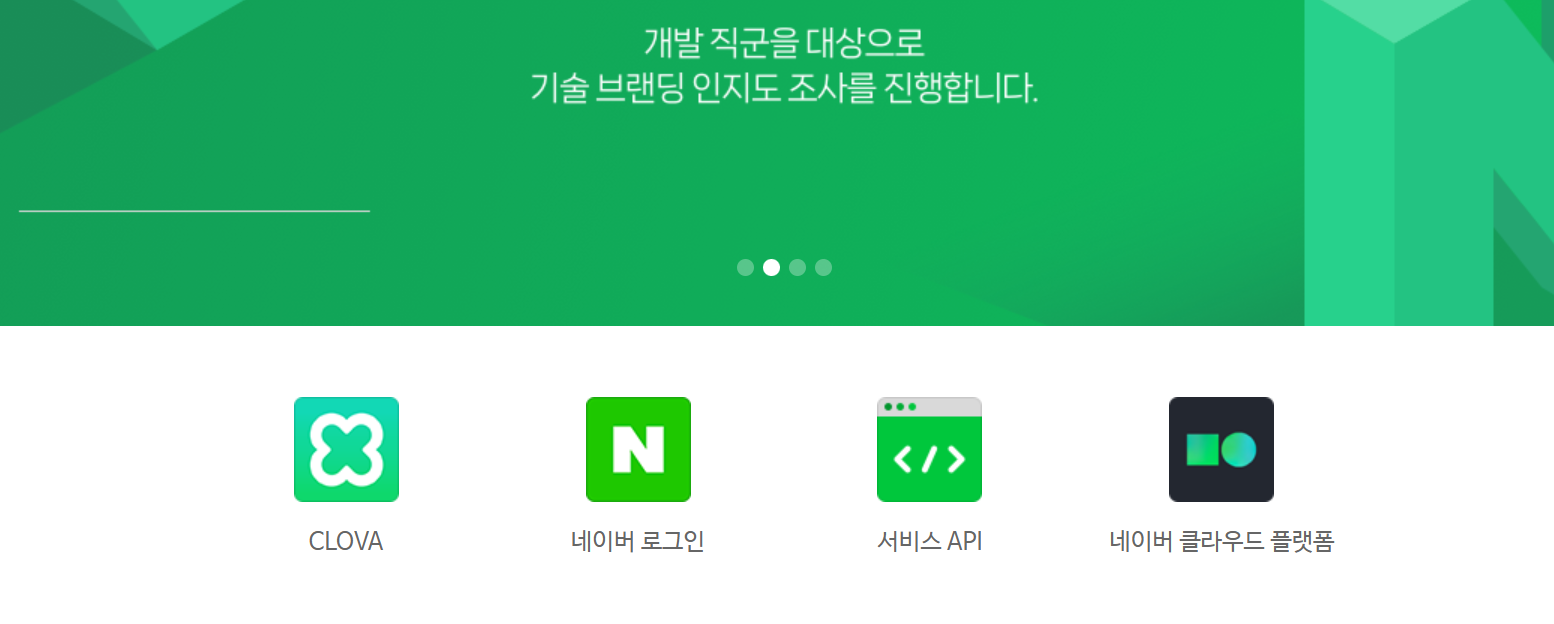

* 오픈 API 이용 신청하기: 화면 왼쪽의 [서비스 API]의 하위 메뉴에서 [검색]을 선택하고, <오픈 API 이용 신청>을 클릭한다.


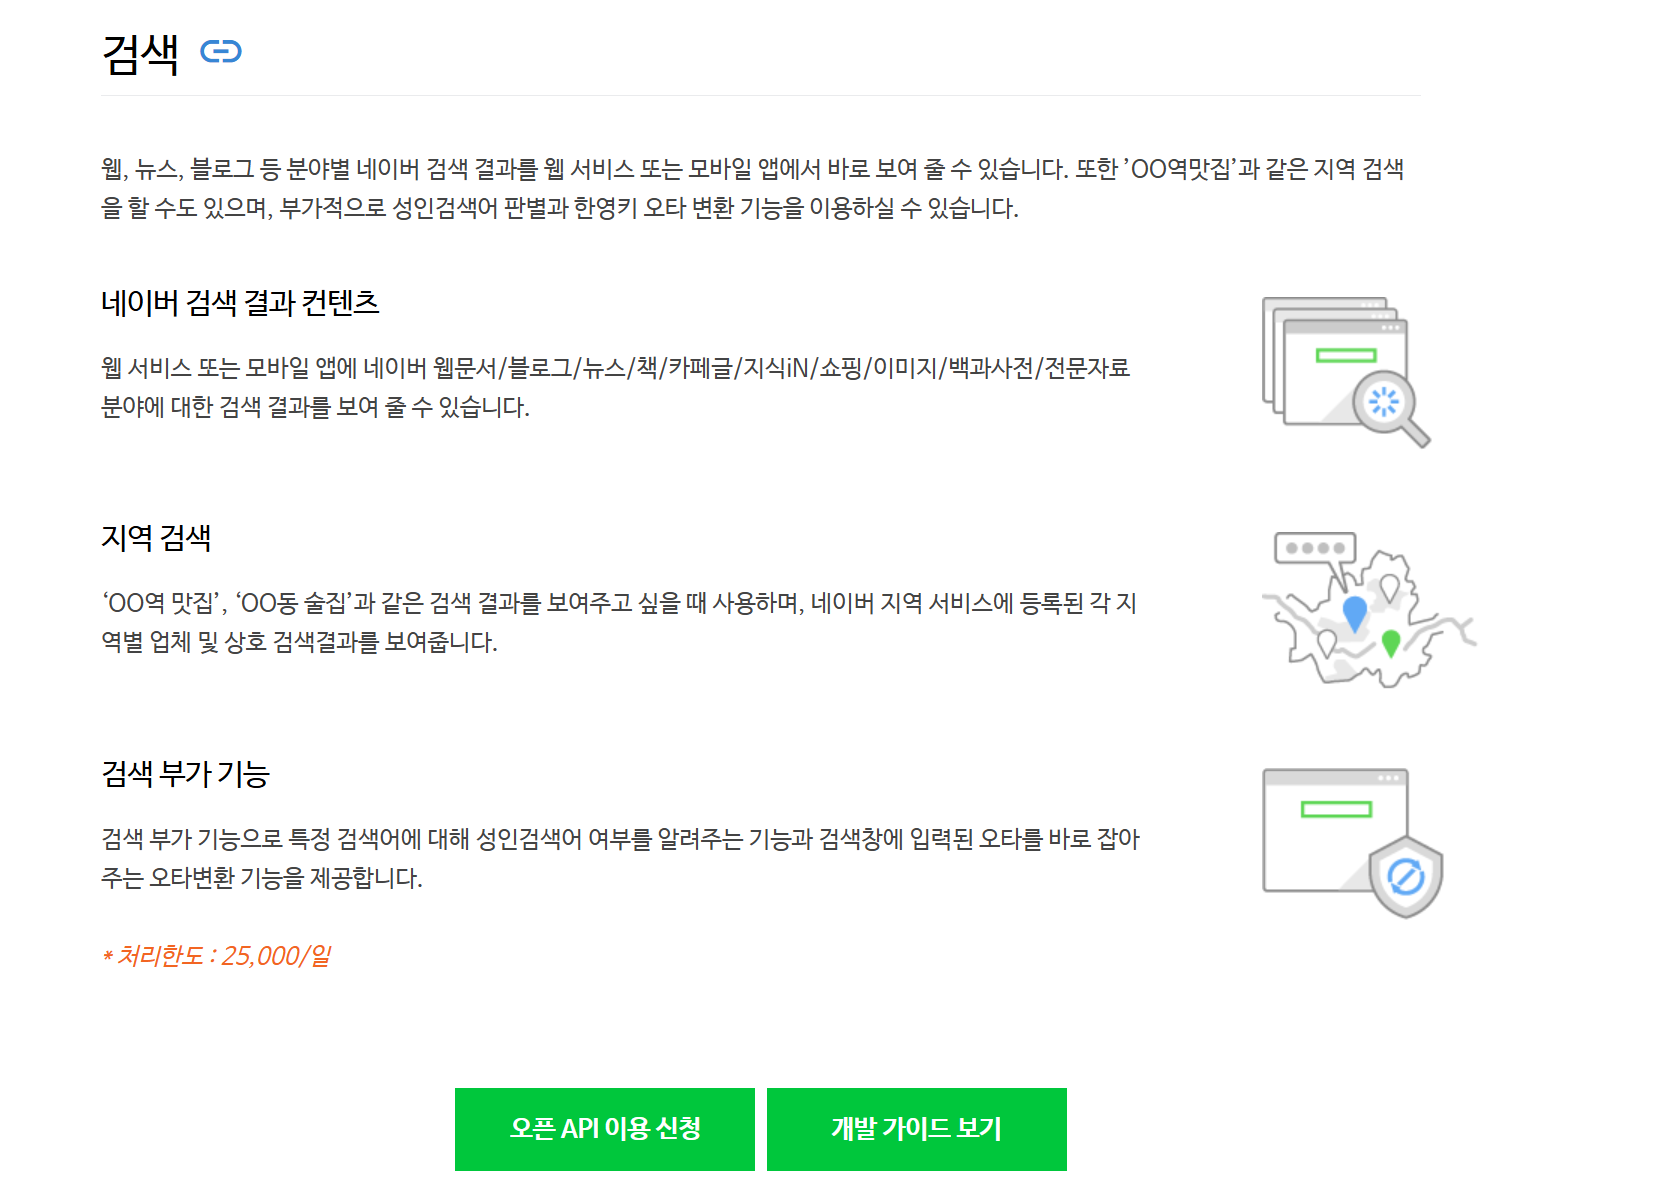

* 애플리케이션 등록하기: [애플리케이션 등록(API 이용 신청)] 화면이 나타난다. API 이용 신청을 위한 등록 과정이므로 화면 상단의 [애플리케이션 이름]에 임의의 이름을 입력한다. 네이버에서 검색 API를 이용해 빅데이터를 수집할 예정으로 애플리케이션 이름을 'nvBig'으로 입력한다. 이전 단계에서 서비스 API 중 [검색]을 선택한 상태이므로 [사용자 API]에 [검색]이 표시되어 있다(원한다면 목록에서 사용자 API를 추가할 수 있다). [비로그인 오픈 API 서비스 환경]에서 [환경 추가]를 클릭한 후 [WEB 설정]을 선택하면 [웹 서비스 URL] 항목이 나타난다. 서비스를 제공할 URL이 없으므로 임의로 'http://localhost'라고 입력하고 <등록하기>를 누른다.

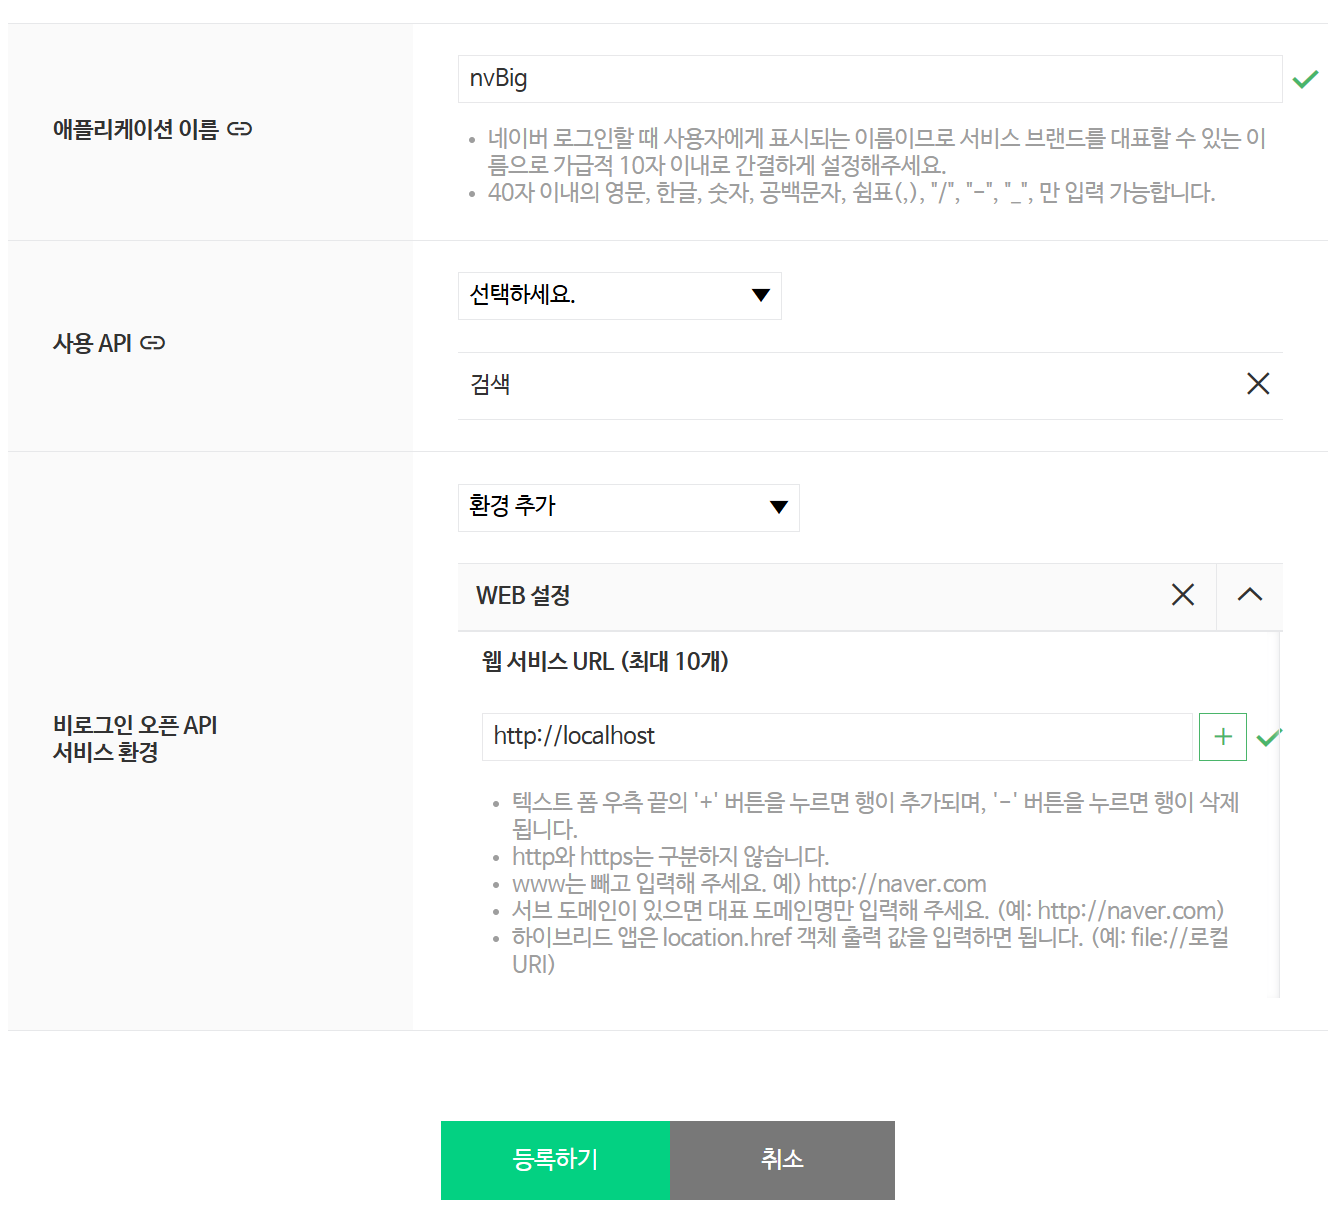

* 애플리케이션 정보 확인하기: 신규 애플리케이션이 등록되면 [개요] 탭에서 애플리케이션 정보를 확인할 수 있다. 화면 하단의 [비로그인 오픈 API 당일 사용량]을 보면 우리가 선택한 [검색]의 [API 호출량/일일허용량]이 [0/25000]으로 표시되어 있다. 아직 한 번도 사용하지 않았으므로 API 호출량이 0이다. 그리고 API마다 일일 허용량 제한이 있는데 네이버의 검색 API는 하루 25.000 번을 호출할 수 있고 한 번 호출할 때 최대 100 건을 가져올 수 있다. 일일 허용량 제한을 초과하여 사용하려면 화면 왼쪽 메뉴의 [API 제휴 신청]을 이용해 네이버와 비즈니스 파트너십을 체결해야 한다. 애플리케이션 정보의 Client ID와 Client Secret은 네이버에서 API를 사용할 때 필요하므로 따로 저장해둔다.

* Client ID: COuRPHYgLt0FBKHAzeC6
* Client Secret: kR5b8ux8GD

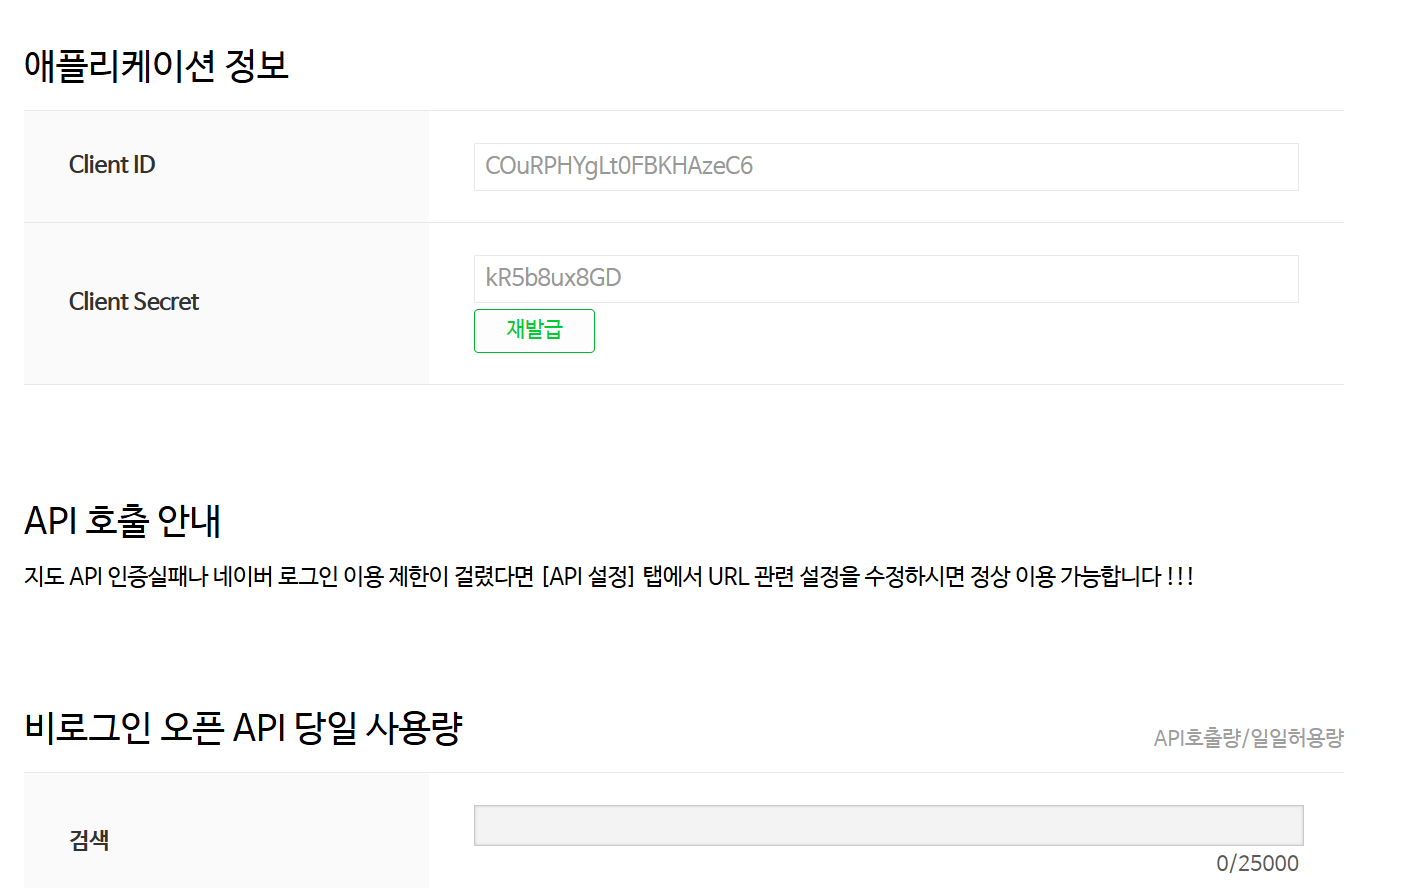

* 검색 API 이용 안내 페이지 확인하기: 화면 상단 메뉴에서 [Documents]-[서비스 API]-[검색]을 선택해 검색 API 이용 안내 페이지로 이동한다. API 호출 예제를 파이썬 코드로 확인할 수 있고 API 기본 정보와 요청 변수에 대한 설명도 확인할 수 있다.

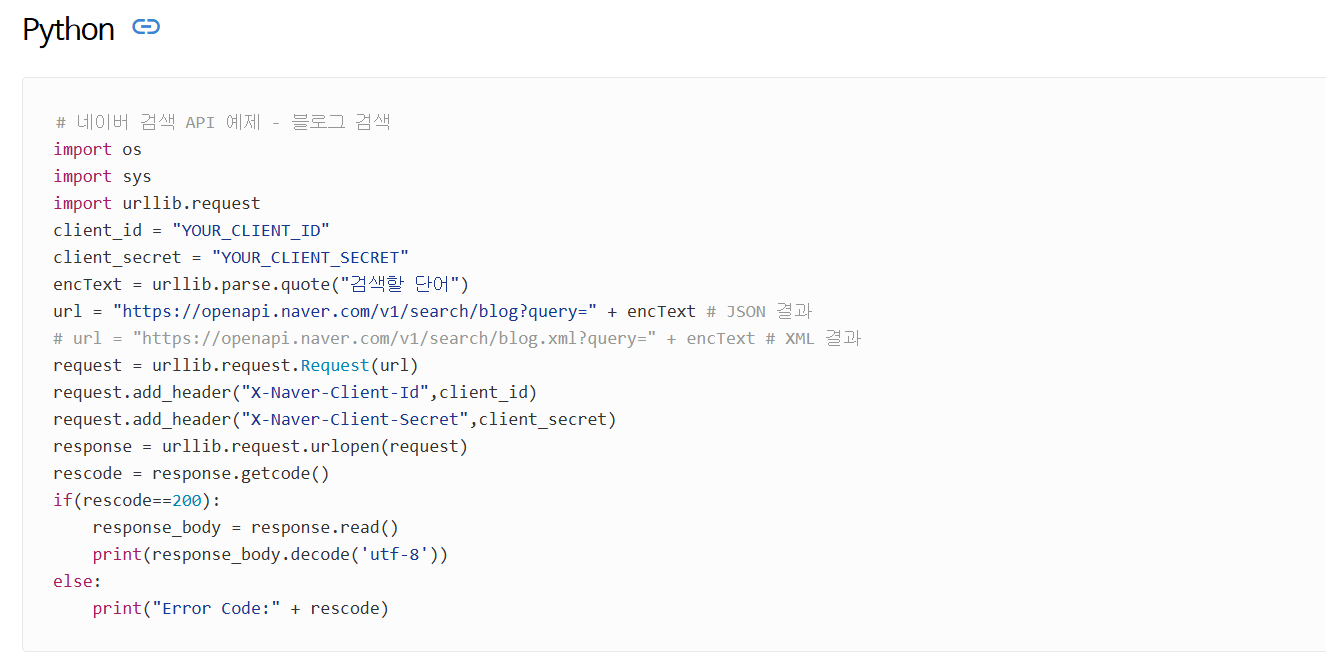

### **네이버 뉴스 크롤링**

앞에서 발급받은 Client ID와 Client Secret을 이용해 네이버 뉴스에서 월드컵 관련 기사를 크롤링한 뒤 파일에 저장해보자.
먼저 전체 작업을 설계하고 프로그램의 각 구성과 개발 함수를 설계한 뒤 전체 프로그램을 작성하는 과정을 진행한다.

#### **전체 작업 설계하기**

```
1. 검색어 지정하기      -> srcText='월드컵'
2. 네이버 뉴스 검색하기 -> getNaverSearch()
    2.1 url 구성하기    -> url = base + node + srcText
    2.2 url 접속과 검색 요청하기    -> urlib.request.urlopen()
    2.3 요청 결과를 응답 JSON으로 받기  -> json.load()
3. 응답 데이터를 정리하여 리스트에 저장하기 -> getPostData()
4. fltmxmfmf JSON 파일로 저장하기   -> json.dumps()
```

#### **함수 설계**

```
- 지역 변수

node: 네이버 검색 API에서 검색할 대상 노드
srcText: 사용자 입력으로 받은 검색어 저장
cnt: 검색 결과 카운트
jsonResult: 검색 결과를 정리하여 저장할 리스트 객체
jsonResponse: 네이버 뉴스 검색에 대한 응답을 저장하는 객체
total: 전체 검색 결과 개수
post: 응답받은 검색 결과 중에서 한 개를 저장한 객체
items: 전체 응답 검색 결과로 내부 항목은 title, originallink, link, description, pubDate
jsonFile: JSON 파일에 저장할 데이터를 담은 객체

- 메서드

input('검색어를 입력하세요: '): 사용자로부터 입력을 받는다.
getNaverSearch(node, srcText, 1, 100): 1부터 100개의 검색 결과를 처리한다.
getPostData(): 검색 결과 한 개를 처리한다.
json.dumps(): 객체를 JSON 형식으로 변환한다.
```

In [ ]:
import os
import sys
import json
import urllib.request
import datetime
import time

client_id = 'COuRPHYgLt0FBKHAzeC6'
client_secret = 'kR5b8ux8GD'


def getRequestUrl(url):
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client_Id", client_id)
    req.add_header("X-Naver_Client_Secret", client_secret)

    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL: %s" % (datetime.datetime.now(), url))
        return None


def getNaverSearch(node, srcText, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)

    url = base + node + parameters
    responseDecode = getRequestUrl(url)

    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)


def getPostData(post, jsonResult, cnt):
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']

    pDate = datetime.datetime.strptime(post['pubDate'], '%a, %d, %b, %Y, %H:%M:%S+0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')

    jsonResult.append({'cnt': cnt, 'title': title, 'description': description, 'org_link': org_link, 'link': link, 'pDate': pDate})

    return


def main():
    node = 'news'   # 크롤링할 대상
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []

    jsonResponse = getNaverSearch(node, srcText, 1, 100)
    total = jsonResponse['total']

    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post, jsonResult, cnt)
        
        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100)

    print('전체 검색: %d 건' % total)

    with open('%s_naver_%s.json' % (srcText, node), 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult, indent = 4, sort_keys = True, ensure_ascii = False)

        outfile.write(jsonFile)
    
    print("가져온 데이터: %d 건" %(cnt))
    print('%s_naver_%s.json SAVED' % (srcText, node))


if __name__ == "__main__":
    main()  # 소스 파일이 임포트되지 않고 독립적으로 실행할 경우에는 main()을 호출하여 시작하라는 의미